# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

In [ ]:
# fetch the web content
url ='https://www.justwatch.com/in/movies?release_year_from=2000'
content = requests.get(url,headers=headers)
soup = BeautifulSoup(content.text,'html.parser')
soup

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-vue-meta="ssr"/><meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/><meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/><meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/><meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/><meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/><meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/><meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" property="og:image:height"/><meta c

## **Fetching Movie URL's**

In [ ]:
movie_url=[]
for x in soup.find_all('a',class_="title-list-grid__item--link"):
    movie_url.append('https://www.justwatch.com'+ x['href'])
print(len(movie_url))
print(movie_url)


100
['https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/tumbbad', 'https://www.justwatch.com/in/movie/project-k', 'https://www.justwatch.com/in/movie/stree', 'https://www.justwatch.com/in/movie/sector-36', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project', 'https://www.justwatch.com/in/movie/thangalaan', 'https://www.justwatch.com/in/movie/siddharth-roy', 'https://www.justwatch.com/in/movie/double-ismart', 'https://www.justwatch.com/in/movie/saripodhaa-sanivaaram', 'https://www.justwatch.com/in/movie/laila-majnu', 'https://www.justwatch.com/in/movie/raayan', 'https://www.justwatch.com/in/movie/thalapathy-68', 'https://www.justwatch.com/in/movie/the-fall-guy', 'https://www.justwatch.com/in/movie/maharaja-2024', 'https://www.justwatch.com/in/movie/inside-out-2', 'https://www.justwatch.com

In [ ]:
info={'url':movie_url}
movie_data=pd.DataFrame(info)
movie_data

,url
0,https://www.justwatch.com/in/movie/stree-2
1,https://www.justwatch.com/in/movie/kill-2024
2,https://www.justwatch.com/in/movie/tumbbad
3,https://www.justwatch.com/in/movie/project-k
4,https://www.justwatch.com/in/movie/stree
...,...
95,https://www.justwatch.com/in/movie/rockstar
96,https://www.justwatch.com/in/movie/uranus-2324
97,https://www.justwatch.com/in/movie/three-thous...
98,https://www.justwatch.com/in/movie/alien-covenant


## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
movie_titles=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    title = soup.find_all('h1')[0].text
  except:
    title='NA'
  movie_titles.append(title)
print(len(movie_titles))
print(movie_titles)

100
[' Stree 2: Sarkate Ka Aatank (2024)', ' Kill (2024)', ' Tumbbad (2018)', ' Kalki 2898-AD (2024)', ' Stree (2018)', ' Sector 36 (2024)', ' Deadpool & Wolverine (2024)', ' Munjya (2024)', ' Bad Newz (2024)', ' Thangalaan (2024)', ' Siddharth Roy (2024)', ' Double Ismart (2024)', ' Saripodhaa Sanivaaram (2024)', ' Laila Majnu (2018)', ' Raayan (2024)', ' The Greatest of All Time (2024)', ' The Fall Guy (2024)', ' Maharaja (2024)', ' Inside Out 2 (2024)', ' Nunakkuzhi (2024)', ' Salaar (2023)', ' Rebel Ridge (2024)', ' Mr Bachchan (2024)', ' The Beast (2024)', ' Aavesham (2024)', ' Je Jatt Vigad Gya (2024)', ' 365 Days (2020)', ' Thalavan (2024)', ' Trisha on the Rocks (2024)', ' Prisoners (2013)', ' Bhediya (2022)', ' Vaazha: Biopic of a Billion Boys (2024)', ' Bad Boys: Ride or Die (2024)', ' It Ends with Us (2024)', ' Ulajh (2024)', ' Pechi (2024)', ' Geostorm (2017)', ' Chandu Champion (2024)', ' Khel Khel Mein (2024)', ' Gifted (2017)', ' The Buckingham Murders (2024)', ' Golam (

## **Scrapping release Year**

In [ ]:
# Write Your Code here
movie_year=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    year = soup.find_all('span',class_='release-year')[0].text
    year = year.replace("(", "").replace(")", "")
  except:
    year='NA'
  movie_year.append(year)
print(len(movie_year))
print(movie_year)

100
['2024', '2024', '2018', '2024', '2018', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2018', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2020', '2024', '2024', '2013', '2022', '2024', '2024', '2024', '2024', '2024', '2017', '2024', '2024', '2017', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2019', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2023', '2015', '2023', '2006', '2019', '2024', '2024', '2001', '2019', '2024', '2000', '2024', '2024', '2024', '2003', '2023', '2024', '2024', '2008', '2023', '2004', '2023', '2024', '2024', '2024', '2024', '2024', '2014', '2024', '2023', '2021', '2024', '2024', '2018', '2015', '2019', '2020', '2011', '2024', '2022', '2017', '2024']


## **Scrapping Genres**

In [ ]:
# Write Your Code here
movie_genre=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
      if x.find_all('h3')[0].text=='Genres':
        genre = x.find_all('span')[0].text
  except:
    genre='NA'
  movie_genre.append(genre)
print(movie_genre)
print(len(movie_genre))

['Comedy, Horror', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Fantasy, Horror, Drama, Mystery & Thriller, Made in Europe', 'Drama, Action & Adventure, Fantasy, Science-Fiction', 'Horror, Comedy, Drama', 'Crime, Mystery & Thriller, Drama', 'Comedy, Science-Fiction, Action & Adventure', 'Comedy, Horror', 'Romance, Comedy, Drama', 'Action & Adventure, Fantasy, History, Drama', 'Drama, Romance', 'Mystery & Thriller, Action & Adventure, Science-Fiction', 'Mystery & Thriller, Action & Adventure, Drama', 'Drama, Romance', 'Drama, Action & Adventure, Mystery & Thriller', 'Action & Adventure, Drama, Mystery & Thriller, Science-Fiction', 'Comedy, Drama, Romance, Action & Adventure', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Comedy, Drama, Animation, Kids & Family, Fantasy', 'Comedy, Kids & Family', 'Drama, Mystery & Thriller, Action & Adventure, Crime, War & Military', 'Mystery & Thriller, Drama, Crime, Action & Adventure', 'Drama, Action & Advent

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
movie_rating=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='poster-detail-infos'):
      if x.find_all('h3')[0].text=='Rating':
        rating = x.find_all('div')[0].text
        rating = rating.split(' ')[0]  # Get the first part (the rating)
        rating = rating.replace('(', '').replace(')', '').replace('%', '')  # Remove parentheses and percentage signs
        rating = float(rating)  # Convert to float
  except:
    rating='NA'
  movie_rating.append(rating)
print(movie_rating)

[7.4, 7.4, 8.2, 8.2, 8.2, 8.2, 7.9, 7.9, 7.9, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 4.9, 4.9, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 6.6, 6.6, 6.6, 6.6, 6.6, 7.1, 7.1, 7.3, 7.3, 7.3, 6.7, 6.7, 6.7, 6.2, 8.8, 6.6, 6.6, 6.6, 7.4, 7.4, 6.6, 7.5, 7.5, 7.5, 6.6, 6.6, 6.6, 6.6, 6.6, 6.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 7.4, 7.4, 7.8, 7.8, 7.8, 5.1]


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
movie_runtime=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
      if x.find_all('h3')[0].text=='Runtime':
        runtime = x.find_all('div')[0].text
  except:
    runtime='NA'
  movie_runtime.append(runtime)
print(movie_runtime)
print(len(movie_runtime))

['2h 27min', '1h 45min', '1h 53min', '2h 56min', '2h 7min', '2h 4min', '2h 8min', '2h 3min', '2h 20min', '2h 36min', '2h 28min', '2h 36min', '2h 50min', '2h 19min', '2h 25min', '3h 3min', '2h 6min', '2h 21min', '1h 37min', '2h 5min', '2h 55min', '2h 12min', '2h 40min', '2h 26min', '2h 38min', '2h 12min', '1h 54min', '2h 13min', '2h 52min', '2h 33min', '2h 36min', '2h 5min', '1h 55min', '2h 10min', '2h 14min', '1h 50min', '1h 49min', '2h 22min', '2h 15min', '1h 41min', '1h 47min', '2h 0min', '2h 30min', '1h 41min', '1h 55min', '2h 47min', '1h 37min', '2h 36min', '2h 3min', '2h 10min', '2h 22min', '1h 59min', '2h 0min', '2h 30min', '2h 28min', '1h 44min', '2h 2min', '2h 56min', '2h 30min', '1h 56min', '3h 0min', '2h 19min', '2h 56min', '2h 13min', '2h 19min', '2h 32min', '1h 50min', '1h 53min', '1h 42min', '2h 23min', '2h 14min', '2h 19min', '1h 51min', '3h 24min', '1h 45min', '2h 13min', '1h 34min', '2h 4min', '3h 12min', '2h 29min', '2h 39min', '2h 14min', '1h 41min', '2h 12min', '2h 3

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
movie_agerating=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
      if x.find_all('h3')[0].text=='Age rating':
        age_rating = x.find_all('div')[0].text
  except:
    agerating='NA'
  movie_agerating.append(age_rating)
print(movie_agerating)
print(len(movie_agerating))

['UA', 'A', 'A', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'U', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'U', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'U', 'U', 'A', 'A', 'U', 'U', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'UA', 'UA', 'UA', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'U', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA']
100


## **Fetching Production Countries Details**

In [ ]:
movie_country=[]
for url in movie_url:
  try:
     content=requests.get(url,headers=headers)
     soup=BeautifulSoup(content.text,'html.parser')
     for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text==' Production country ':
        country=x.find_all('div')[0].text
  except:
    runtime='NA'
  movie_country.append(country)
print(movie_country)
print(len(movie_country))

['India', 'India', 'Sweden, India', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'India', 'Canada, United States, Australia', 'India', 'United States', 'India', 'India', 'United States', 'India', 'France, Canada', 'India', 'India', 'Poland', 'India', 'India', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'India', 'United States, Canada, Hong Kong', 'India', 'India', 'United Kingdom, United States', 'India, United Kingdom', 'India', 'India', 'Canada, United States', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'United States, India', 'India', 'Australia, United States', 'India', 'India', 'India', 'India', 'India', 'United Kingdom, United States', 'United States, United Kingdom', 'India', 'India', 'India', 'United States, United Kingdom', 'South Korea', 'Australia, Czech Republic, United States', 'Canada, United States',

> Fetching Directors

In [ ]:
movie_director=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='poster-detail-infos'):
      if x.find_all('h3')[0].text=='Director':
        director = x.find_all('span')[0].text
  except:
    director='NA'
  movie_director.append(director)
print(movie_director)
print(len(movie_director))

[' Amar Kaushik ', ' Amar Kaushik ', ' Rahi Anil Barve ', ' Rahi Anil Barve ', ' Rahi Anil Barve ', ' Rahi Anil Barve ', ' Shawn Levy ', ' Shawn Levy ', ' Shawn Levy ', ' Pa. Ranjith ', ' Pa. Ranjith ', ' Pa. Ranjith ', ' Pa. Ranjith ', ' Pa. Ranjith ', ' Pa. Ranjith ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Venkat Prabhu ', ' Jis Joy ', ' Jis Joy ', ' Jis Joy ', ' Jis Joy ', ' Jis Joy ', ' Jis Joy ', ' Justin Baldoni ', ' Justin Baldoni ', ' Justin Baldoni ', ' Justin Baldoni ', ' Justin Baldoni ', ' Mudassar Aziz ', ' Mudassar Aziz ', ' Hansal Mehta ', ' Hansal Mehta ', ' Hansal Mehta ', ' Oz Perkins ', ' Oz Perkins ', ' Oz Perkins ', ' Chris Renaud ', ' Chris Renaud ', ' Lee Isaac Chung ', ' Lee Isaac Chung ', ' Lee Isaac Chung ', ' Fede Álvarez ', ' Fede Álvarez ', ' Nikkhil Advani ', ' George Miller ', ' George 

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
movie_stream_service=[]
for url in movie_url:
  try:
    content = requests.get(url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    names=[x['alt'] for x in soup.find_all('img',class_='offer__icon')]
  except:
      names='NA'
  movie_stream_service.append(" , ".join(names))
combined_stream_services = " | ".join(movie_stream_service)
print(movie_stream_service)
print(len(movie_stream_service))




['Amazon Video , Bookmyshow', 'Hotstar , Bookmyshow', 'Bookmyshow', 'Amazon Prime Video , Amazon Prime Video , Netflix , Amazon Video , Bookmyshow', 'Apple TV , Hotstar , Apple TV , Apple TV', 'Netflix', 'Apple TV , Apple TV', 'Hotstar', 'Amazon Prime Video , Amazon Prime Video , Amazon Video', '', 'aha', 'Amazon Prime Video , Amazon Prime Video , Amazon Video', 'Netflix , Bookmyshow', 'Zee5 , VI movies and tv', 'Amazon Prime Video , Amazon Prime Video , Sun Nxt , Amazon Video', 'Bookmyshow', 'Apple TV , Jio Cinema , Zee5 , Amazon Video , Apple TV , Apple TV', 'Netflix', 'Apple TV , Hotstar , Apple TV , Bookmyshow', 'Zee5', 'VI movies and tv , Hotstar , Netflix , Bookmyshow', 'Netflix', 'Netflix', 'Amazon Prime Video , Amazon Prime Video', 'Amazon Prime Video , Amazon Prime Video , Hotstar , Amazon Video', '', 'Netflix', '', 'Amazon Prime Video , Apple TV , Amazon Prime Video , Apple TV , Apple TV', 'Amazon Prime Video , Apple TV , Amazon Prime Video , Lionsgate Play , FilmBox+ , Amazo

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
info = {'title':movie_titles,'release year':movie_year,'genre':movie_genre,'imdb_rating':movie_rating,'duration':movie_runtime,'age_rating':movie_agerating,'Production country':movie_country,'director':movie_director,'stream_service':movie_stream_service,'url':movie_url}
movie_data = pd.DataFrame(info)
movie_data


,title,release year,genre,imdb_rating,duration,age_rating,Production country,director,stream_service,url
0,Stree 2: Sarkate Ka Aatank (2024),2024,"Comedy, Horror",7.4,2h 27min,UA,India,Amar Kaushik,"Amazon Video , Bookmyshow",https://www.justwatch.com/in/movie/stree-2
1,Kill (2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",7.4,1h 45min,A,India,Amar Kaushik,"Hotstar , Bookmyshow",https://www.justwatch.com/in/movie/kill-2024
2,Tumbbad (2018),2018,"Fantasy, Horror, Drama, Mystery & Thriller, Ma...",8.2,1h 53min,A,"Sweden, India",Rahi Anil Barve,Bookmyshow,https://www.justwatch.com/in/movie/tumbbad
3,Kalki 2898-AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",8.2,2h 56min,UA,India,Rahi Anil Barve,"Amazon Prime Video , Amazon Prime Video , Netf...",https://www.justwatch.com/in/movie/project-k
4,Stree (2018),2018,"Horror, Comedy, Drama",8.2,2h 7min,UA,India,Rahi Anil Barve,"Apple TV , Hotstar , Apple TV , Apple TV",https://www.justwatch.com/in/movie/stree
...,...,...,...,...,...,...,...,...,...,...
95,Rockstar (2011),2011,"Drama, Music & Musical, Romance",7.4,2h 39min,UA,India,Pushkar Mahabal,"Apple TV , Jio Cinema , Zee5 , VI movies and t...",https://www.justwatch.com/in/movie/rockstar
96,Uranus 2324 (2024),2024,"Romance, Drama, Science-Fiction",7.8,2h 28min,UA,Thailand,Thanadol Nuansut,,https://www.justwatch.com/in/movie/uranus-2324
97,Three Thousand Years of Longing (2022),2022,"Fantasy, Romance, Drama",7.8,1h 48min,UA,"China, United Kingdom, Australia",Thanadol Nuansut,"Amazon Prime Video , Apple TV , Amazon Prime V...",https://www.justwatch.com/in/movie/three-thous...
98,Alien: Covenant (2017),2017,"Mystery & Thriller, Horror, Science-Fiction",7.8,2h 2min,UA,United States,Thanadol Nuansut,"Apple TV , Hotstar , Amazon Video , Apple TV ,...",https://www.justwatch.com/in/movie/alien-covenant


In [ ]:
cleaned_movie_data = movie_data.dropna()
print(cleaned_movie_data)
df=cleaned_movie_data
df

                                      title release year  \
0         Stree 2: Sarkate Ka Aatank (2024)         2024   
1                               Kill (2024)         2024   
2                            Tumbbad (2018)         2018   
3                      Kalki 2898-AD (2024)         2024   
4                              Stree (2018)         2018   
..                                      ...          ...   
95                          Rockstar (2011)         2011   
96                       Uranus 2324 (2024)         2024   
97   Three Thousand Years of Longing (2022)         2022   
98                   Alien: Covenant (2017)         2017   
99                      Subservience (2024)         2024   

                                                genre  imdb_rating  duration  \
0                                      Comedy, Horror          7.4  2h 27min   
1   Crime, Drama, Mystery & Thriller, Action & Adv...          7.4  1h 45min   
2   Fantasy, Horror, Drama, Mystery & T

,title,release year,genre,imdb_rating,duration,age_rating,Production country,director,stream_service,url
0,Stree 2: Sarkate Ka Aatank (2024),2024,"Comedy, Horror",7.4,2h 27min,UA,India,Amar Kaushik,"Amazon Video , Bookmyshow",https://www.justwatch.com/in/movie/stree-2
1,Kill (2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",7.4,1h 45min,A,India,Amar Kaushik,"Hotstar , Bookmyshow",https://www.justwatch.com/in/movie/kill-2024
2,Tumbbad (2018),2018,"Fantasy, Horror, Drama, Mystery & Thriller, Ma...",8.2,1h 53min,A,"Sweden, India",Rahi Anil Barve,Bookmyshow,https://www.justwatch.com/in/movie/tumbbad
3,Kalki 2898-AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",8.2,2h 56min,UA,India,Rahi Anil Barve,"Amazon Prime Video , Amazon Prime Video , Netf...",https://www.justwatch.com/in/movie/project-k
4,Stree (2018),2018,"Horror, Comedy, Drama",8.2,2h 7min,UA,India,Rahi Anil Barve,"Apple TV , Hotstar , Apple TV , Apple TV",https://www.justwatch.com/in/movie/stree
...,...,...,...,...,...,...,...,...,...,...
95,Rockstar (2011),2011,"Drama, Music & Musical, Romance",7.4,2h 39min,UA,India,Pushkar Mahabal,"Apple TV , Jio Cinema , Zee5 , VI movies and t...",https://www.justwatch.com/in/movie/rockstar
96,Uranus 2324 (2024),2024,"Romance, Drama, Science-Fiction",7.8,2h 28min,UA,Thailand,Thanadol Nuansut,,https://www.justwatch.com/in/movie/uranus-2324
97,Three Thousand Years of Longing (2022),2022,"Fantasy, Romance, Drama",7.8,1h 48min,UA,"China, United Kingdom, Australia",Thanadol Nuansut,"Amazon Prime Video , Apple TV , Amazon Prime V...",https://www.justwatch.com/in/movie/three-thous...
98,Alien: Covenant (2017),2017,"Mystery & Thriller, Horror, Science-Fiction",7.8,2h 2min,UA,United States,Thanadol Nuansut,"Apple TV , Hotstar , Amazon Video , Apple TV ,...",https://www.justwatch.com/in/movie/alien-covenant


## **Scraping TV  Show Data**

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_url = 'https://www.justwatch.com/in/tv-shows'
content = requests.get(tv_url,headers=headers)
soup = BeautifulSoup(content.text,'html.parser')
soup

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-vue-meta="ssr"/><meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/><meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/><meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/><meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/><meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/><meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/><meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" property="og:image:height"/><meta c

In [ ]:
tv_urls=[]
for x in soup.find_all('a',class_="title-list-grid__item--link"):
    tv_urls.append('https://www.justwatch.com'+x['href'])
print(len(tv_urls))
print(tv_urls)

40
['https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/adams-sweet-agony', 'https://www.justwatch.com/in/tv-show/taaza-khabar', 'https://www.justwatch.com/in/tv-show/call-me-bae', 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah', 'https://www.justwatch.com/in/tv-show/ic-814', 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power', 'https://www.justwatch.com/in/tv-show/the-penguin', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/the-old-man', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/only-murders-in-the-building', 'https://www.justwatch.com/in/tv-show/shekhar-home', 'https://www.justwatch.com/in/tv-show/the-boys', 'http

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
tv_titles=[]
for tv_url in tv_urls:
  content=requests.get(tv_url,headers=headers)
  # Check if the request was successful
  if content.status_code == 200:
    soup=BeautifulSoup(content.text,'html.parser')
    # Check if any h1 tags were found
    h1_tags = soup.find_all('h1')
    if h1_tags:
      title_name=h1_tags[0].text
      tv_titles.append(title_name)
    else:
      print(f"No h1 tag found for {tv_url}")
  else:
    print(f"Request failed for {tv_url} with status code: {content.status_code}")
print(len(tv_titles))
print(tv_titles)


40
[' From (2022)', ' Mirzapur (2018)', " Adam's Sweet Agony (2024)", ' Taaza Khabar (2023)', ' Call Me Bae (2024)', ' Gyaarah Gyaarah (2024)', ' IC 814: The Kandahar Hijack (2024)', ' The Lord of the Rings: The Rings of Power (2022)', ' The Penguin (2024)', ' Shōgun (2024)', ' Game of Thrones (2011)', ' The Old Man (2022)', ' XXX: Uncensored (2018)', ' Panchayat (2020)', ' House of the Dragon (2022)', ' Only Murders in the Building (2021)', ' Shekhar Home (2024)', ' The Boys (2019)', ' Bigg Boss (2006)', ' Agatha All Along (2024)', ' The Perfect Couple (2024)', ' Tell Me Lies (2022)', ' Mastram (2020)', ' Attack on Titan (2013)', ' Terminator Zero (2024)', ' Tulsa King (2022)', ' Kaos (2024)', ' Breaking Bad (2008)', ' Farzi (2023)', ' Apharan (2018)', ' Slow Horses (2022)', ' Naruto Shippūden (2007)', ' One Piece (1999)', ' Into the Fire: The Lost Daughter (2024)', ' Love Next Door (2024)', ' No Gain No Love (2024)', ' Demon Slayer: Kimetsu no Yaiba (2019)', ' The Rookie (2018)', ' A

## **Fetching Release Year**

In [ ]:
# Write Your Code here
tvshow_year=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    year = soup.find_all('span',class_='release-year')[0].text
    year = year.replace("(", "").replace(")", "")
  except:
    year='NA'
  tvshow_year.append(year)
print(len(tvshow_year))
print(tvshow_year)



40
['2022', '2018', '2024', '2023', '2024', '2024', '2024', '2022', '2024', '2024', '2011', '2022', '2018', '2020', '2022', '2021', '2024', '2019', '2006', '2024', '2024', '2022', '2020', '2013', '2024', '2022', '2024', '2008', '2023', '2018', '2022', '2007', '1999', '2024', '2024', '2024', '2019', '2018', '2019', '2024']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
tvshow_genre=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
      if x.find_all('h3')[0].text=='Genres':
        genre = x.find_all('span')[0].text
  except:
    genre='NA'
  tvshow_genre.append(genre)
print(tvshow_genre)
print(len(tvshow_genre))


['Drama, Horror, Science-Fiction, Mystery & Thriller', 'Action & Adventure, Drama, Mystery & Thriller, Crime', 'Animation', 'Science-Fiction, Drama, Fantasy, Mystery & Thriller, Action & Adventure, Comedy', 'Romance, Drama, Comedy', 'Drama, Fantasy, Science-Fiction', 'History, Mystery & Thriller, Drama, War & Military', 'Action & Adventure, Science-Fiction, Drama, Fantasy', 'Drama, Crime, Fantasy', 'Drama, War & Military, History', 'Action & Adventure, Science-Fiction, Drama, Fantasy', 'Drama, Action & Adventure, Mystery & Thriller', 'Comedy, Drama, Romance', 'Drama, Comedy', 'Drama, Action & Adventure, Science-Fiction, Fantasy, Romance', 'Comedy, Crime, Drama, Mystery & Thriller', 'Drama, Crime', 'Science-Fiction, Action & Adventure, Comedy, Crime, Drama', 'Reality TV, Kids & Family', 'Mystery & Thriller, Science-Fiction, Action & Adventure, Fantasy, Comedy, Drama', 'Mystery & Thriller, Crime, Drama', 'Drama', 'Comedy, Drama, Fantasy', 'Animation, Action & Adventure, Drama, Fantasy, H

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
tvshow_rating=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='poster-detail-infos'):
      if x.find_all('h3')[0].text=='Rating':
        rating = x.find_all('div')[0].text
        rating = rating.split(' ')[0]  # Get the first part (the rating)
        rating = rating.replace('(', '').replace(')', '').replace('%', '')  # Remove parentheses and percentage signs
        rating = float(rating)  # Convert to float
  except:
    ratings='NA'
  tvshow_rating.append(rating)
print(tvshow_rating)
print(len(tvshow_rating))

[5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 8.0, 8.0, 8.0]
40


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
tvshow_agerating=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
      if x.find_all('h3')[0].text=='Age rating':
        age_rating = x.find_all('div')[0].text
  except:
    age_rating='NA'
  tvshow_agerating.append(age_rating)
print(tvshow_agerating)
print(len(tvshow_agerating))

['UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'UA', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'UA', 'A']
40


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
tvshow_country=[]
for tv_url in tv_urls:
  try:
     content=requests.get(tv_url,headers=headers)
     soup=BeautifulSoup(content.text,'html.parser')
     for x in soup.find_all('div',class_='detail-infos'):
       if x.find_all('h3')[0].text==' Production country ':
        country=x.find_all('div')[0].text
  except:
    country='NA'
  tvshow_country.append(country)
print(tvshow_country)
print(len(tvshow_country))

['United States', 'India', 'Japan', 'India', 'India', 'India', 'India', 'United States', 'United States', 'United States', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'India', 'United States', 'India', 'United States', 'United States', 'United States', 'India', 'Japan', 'Japan, United States', 'United States', 'United Kingdom', 'United States', 'India', 'India', 'United Kingdom', 'Japan', 'Japan', 'United States', 'South Korea', 'South Korea', 'Japan', 'United States', 'India', 'United States']
40


**FETCH** **DIRECTORS**


In [ ]:
tvshow_director=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='poster-detail-infos'):
      if x.find_all('h3')[0].text=='Director':
        director = x.find_all('span')[0].text
  except:
    director='NA'
  tvshow_director.append(director)
print(tvshow_director)
print(len(tvshow_director))

[' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' SK Dale ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ', ' Salman Khan ']
40


## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
tvshow_stream_service=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    names=[x['alt'] for x in soup.find_all('img',class_='offer__icon')]
  except:
      names='NA'
  tvshow_stream_service.append(" , ".join(names))
combined_stream_services = " | ".join(tvshow_stream_service)
print(tvshow_stream_service)
print(len(tvshow_stream_service))

['Amazon Prime Video , Amazon Prime Video', 'Amazon Prime Video , Amazon Prime Video', 'Amazon Prime Video , Amazon Prime Video , Anime Times Amazon Channel', 'Hotstar', 'Amazon Prime Video , Amazon Prime Video', 'Zee5', 'Netflix', 'Amazon Prime Video , Amazon Prime Video', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Hotstar', 'Alt Balaji', 'Amazon Prime Video , Amazon Prime Video', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video , Amazon Prime Video', 'Hotstar', 'Hotstar', 'Netflix', 'Hotstar', 'VI movies and tv', 'Anime Times Amazon Channel', 'Netflix', 'Jio Cinema', 'Netflix', 'Netflix', 'Amazon Prime Video , Amazon Prime Video', 'Alt Balaji', 'Apple TV Plus , Apple TV+', 'Crunchyroll , Netflix , Crunchyroll , Crunchyroll Amazon Channel', 'Crunchyroll , Crunchyroll', 'Netflix', 'Netflix', 'Amazon Prime Video , Amazon Prime Video', 'Crunchyroll , Netflix , Crunchyroll , Crunchyroll Amazon Channel', '', 'Zee5 , VI movies and tv', 'Netflix']
40


## **Fetching Duration Details**

In [ ]:
# Write Your Code here
tvshow_runtime=[]
for tv_url in tv_urls:
  try:
    content = requests.get(tv_url,headers=headers)
    soup = BeautifulSoup(content.text,'html.parser')
    for x in soup.find_all('div',class_='detail-infos'):
      if x.find_all('h3')[0].text=='Runtime':
        runtime = x.find_all('div')[0].text
  except:
    runtime='NA'
  tvshow_runtime.append(runtime)
print(tvshow_runtime)
print(len(tvshow_runtime))

['50min', '50min', '3min', '29min', '39min', '44min', '38min', '1h 8min', '1h 2min', '59min', '58min', '53min', '22min', '35min', '1h 3min', '35min', '42min', '1h 1min', '1h 15min', '39min', '51min', '50min', '28min', '25min', '28min', '40min', '50min', '47min', '56min', '24min', '45min', '24min', '23min', '1h 16min', '1h 21min', '1h 8min', '26min', '42min', '30min', '53min']
40


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
info = {'title':tv_titles,'release year':tvshow_year,'genre':tvshow_genre,'imdb_rating':tvshow_rating,'duration':tvshow_runtime,'age_rating':tvshow_agerating,'Production country':tvshow_country,'director':tvshow_director,'stream_service':tvshow_stream_service,'url':tv_urls}
tv_data = pd.DataFrame(info)
tv_data


,title,release year,genre,imdb_rating,duration,age_rating,Production country,director,stream_service,url
0,From (2022),2022,"Drama, Horror, Science-Fiction, Mystery & Thri...",5.1,50min,UA,United States,SK Dale,"Amazon Prime Video , Amazon Prime Video",https://www.justwatch.com/in/tv-show/from
1,Mirzapur (2018),2018,"Action & Adventure, Drama, Mystery & Thriller,...",5.1,50min,A,India,SK Dale,"Amazon Prime Video , Amazon Prime Video",https://www.justwatch.com/in/tv-show/mirzapur
2,Adam's Sweet Agony (2024),2024,Animation,5.1,3min,A,Japan,SK Dale,"Amazon Prime Video , Amazon Prime Video , Anim...",https://www.justwatch.com/in/tv-show/adams-swe...
3,Taaza Khabar (2023),2023,"Science-Fiction, Drama, Fantasy, Mystery & Thr...",5.1,29min,A,India,SK Dale,Hotstar,https://www.justwatch.com/in/tv-show/taaza-khabar
4,Call Me Bae (2024),2024,"Romance, Drama, Comedy",5.1,39min,A,India,SK Dale,"Amazon Prime Video , Amazon Prime Video",https://www.justwatch.com/in/tv-show/call-me-bae
5,Gyaarah Gyaarah (2024),2024,"Drama, Fantasy, Science-Fiction",5.1,44min,A,India,SK Dale,Zee5,https://www.justwatch.com/in/tv-show/gyaarah-g...
6,IC 814: The Kandahar Hijack (2024),2024,"History, Mystery & Thriller, Drama, War & Mili...",5.1,38min,A,India,SK Dale,Netflix,https://www.justwatch.com/in/tv-show/ic-814
7,The Lord of the Rings: The Rings of Power (2022),2022,"Action & Adventure, Science-Fiction, Drama, Fa...",5.1,1h 8min,A,United States,SK Dale,"Amazon Prime Video , Amazon Prime Video",https://www.justwatch.com/in/tv-show/the-lord-...
8,The Penguin (2024),2024,"Drama, Crime, Fantasy",5.1,1h 2min,A,United States,SK Dale,Jio Cinema,https://www.justwatch.com/in/tv-show/the-penguin
9,Shōgun (2024),2024,"Drama, War & Military, History",5.1,59min,A,United States,SK Dale,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024


In [ ]:
# Remove rows with any NA values
cleaned_tv_data = tv_data.dropna()
print(cleaned_tv_data)

                                                title release year  \
0                                         From (2022)         2022   
1                                     Mirzapur (2018)         2018   
2                           Adam's Sweet Agony (2024)         2024   
3                                 Taaza Khabar (2023)         2023   
4                                  Call Me Bae (2024)         2024   
5                              Gyaarah Gyaarah (2024)         2024   
6                  IC 814: The Kandahar Hijack (2024)         2024   
7    The Lord of the Rings: The Rings of Power (2022)         2022   
8                                  The Penguin (2024)         2024   
9                                       Shōgun (2024)         2024   
10                             Game of Thrones (2011)         2011   
11                                 The Old Man (2022)         2022   
12                             XXX: Uncensored (2018)         2018   
13                  

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
import pandas as pd
from datetime import datetime, timedelta

# Your dataset
import pandas as pd
from datetime import datetime
# Get the current year
current_year = datetime.now().year

# Calculate the cutoff year (2 years ago)
cutoff_year = current_year - 2
# Filter cleaned_movee_data for movies

# Convert 'release year' to numeric, coerce errors to NaN
cleaned_movie_data['release year'] = pd.to_numeric(cleaned_movie_data['release year'], errors='coerce')
cleaned_tv_data['release year'] = pd.to_numeric(cleaned_tv_data['release year'], errors='coerce')

filtered_movies = cleaned_movie_data[
    (cleaned_movie_data['release year'] >= cutoff_year) &
    (cleaned_movie_data['imdb_rating'] >= 7)
]

# Filter cleaned_tv_data for TV shows
filtered_tv_shows = cleaned_tv_data[
    (cleaned_tv_data['release year'] >= cutoff_year) &
    (cleaned_tv_data['imdb_rating'] >= 7)
]
print("Filtered Movies:")
print(filtered_movies)

print("\nFiltered TV Shows:")
print(filtered_tv_shows)

Filtered Movies:
                                       title  release year  \
0          Stree 2: Sarkate Ka Aatank (2024)          2024   
1                                Kill (2024)          2024   
3                       Kalki 2898-AD (2024)          2024   
5                           Sector 36 (2024)          2024   
6                Deadpool & Wolverine (2024)          2024   
7                              Munjya (2024)          2024   
8                            Bad Newz (2024)          2024   
9                          Thangalaan (2024)          2024   
10                      Siddharth Roy (2024)          2024   
11                      Double Ismart (2024)          2024   
12              Saripodhaa Sanivaaram (2024)          2024   
14                             Raayan (2024)          2024   
27                           Thalavan (2024)          2024   
28                Trisha on the Rocks (2024)          2024   
30                            Bhediya (2022)         

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here

average_movie_rating = cleaned_movie_data['imdb_rating'].mean()


average_tv_rating = cleaned_tv_data['imdb_rating'].mean()


print(f"Average Movie Rating: {average_movie_rating:.2f}" if not pd.isna(average_movie_rating) else "No valid movie ratings.")
print(f"Average TV Show Rating: {average_tv_rating:.2f}" if not pd.isna(average_tv_rating) else "No valid TV ratings.")

Average Movie Rating: 7.01
Average TV Show Rating: 4.60


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
def extract_genre(df):
    # Split genres into a list and explode to create separate rows for each genre
    return df['genre'].str.split(', ').explode()

# Extract and combine genres from movies and TV shows
movie_genres = extract_genre(cleaned_movie_data)
tv_genres = extract_genre(cleaned_tv_data)

# Combine the two Series into one
all_genres = pd.concat([movie_genres, tv_genres])

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Get the top 5 genres
top_5_genres = genre_counts.head(5)

# Output results
print("Top 5 Genres with Highest Number of Available Movies and TV Shows:")
print(top_5_genres)

Top 5 Genres with Highest Number of Available Movies and TV Shows:
genre
Drama                 100
Mystery & Thriller     69
Action & Adventure     58
Crime                  41
Comedy                 39
Name: count, dtype: int64


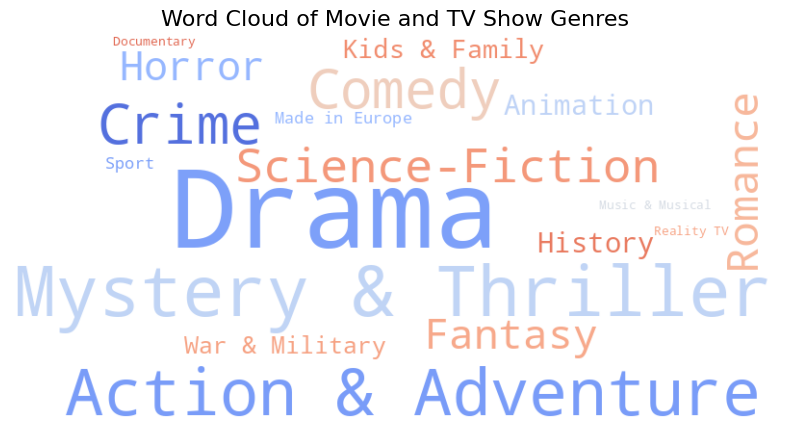

In [ ]:
#Let's Visualize it using word cloud
#first we import matplotlib and wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#then we get the genre counts
def extract_genre(df):
    # Split genres into a list and explode to create separate rows for each genre
    return df['genre'].str.split(', ').explode()

# Extract and combine genres from movies and TV shows
movie_genres = extract_genre(cleaned_movie_data)
tv_genres = extract_genre(cleaned_tv_data)

# Combine the two Series into one
all_genres = pd.concat([movie_genres, tv_genres])

# Count the occurrences of each genre
genre_counts = all_genres.value_counts()

# Then Create a dictionary for word cloud
genre_dict = dict(genre_counts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(genre_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Movie and TV Show Genres', fontsize=16)
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
all_streaming_services = pd.concat([
    cleaned_movie_data[['stream_service']],
    cleaned_tv_data[['stream_service']]
],ignore_index=True)

# Count the occurrences of each streaming service
service_counts = all_streaming_services['stream_service'].value_counts()

# Identify the streaming service with the most offerings
top_service = service_counts.idxmax()
top_service_count = service_counts.max()

# Output results
print(f"The streaming service with the most significant number of offerings is '{top_service}' with {top_service_count} offerings.")

The streaming service with the most significant number of offerings is 'Netflix' with 20 offerings.


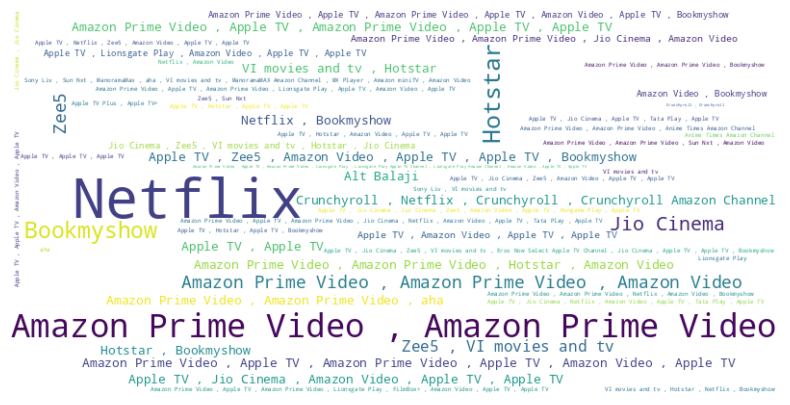

In [ ]:
#Let's Visvalize it using word cloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count the occurrences of each streaming service
service_counts = all_streaming_services['stream_service'].value_counts()

# Convert the series to a dictionary for word cloud input
service_dict = service_counts.to_dict()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(service_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
final_df = pd.concat([filtered_movies, filtered_tv_shows], ignore_index=True)
final_df

,title,release year,genre,imdb_rating,duration,age_rating,Production country,director,stream_service,url
0,Stree 2: Sarkate Ka Aatank (2024),2024,"Comedy, Horror",7.4,2h 27min,UA,India,Amar Kaushik,"Amazon Video , Bookmyshow",https://www.justwatch.com/in/movie/stree-2
1,Kill (2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",7.4,1h 45min,A,India,Amar Kaushik,"Hotstar , Bookmyshow",https://www.justwatch.com/in/movie/kill-2024
2,Kalki 2898-AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",8.2,2h 56min,UA,India,Rahi Anil Barve,"Amazon Prime Video , Amazon Prime Video , Netf...",https://www.justwatch.com/in/movie/project-k
3,Sector 36 (2024),2024,"Crime, Mystery & Thriller, Drama",8.2,2h 4min,A,India,Rahi Anil Barve,Netflix,https://www.justwatch.com/in/movie/sector-36
4,Deadpool & Wolverine (2024),2024,"Comedy, Science-Fiction, Action & Adventure",7.9,2h 8min,A,United States,Shawn Levy,"Apple TV , Apple TV",https://www.justwatch.com/in/movie/deadpool-3
5,Munjya (2024),2024,"Comedy, Horror",7.9,2h 3min,UA,India,Shawn Levy,Hotstar,https://www.justwatch.com/in/movie/munjha
6,Bad Newz (2024),2024,"Romance, Comedy, Drama",7.9,2h 20min,UA,India,Shawn Levy,"Amazon Prime Video , Amazon Prime Video , Amaz...",https://www.justwatch.com/in/movie/untitled-vi...
7,Thangalaan (2024),2024,"Action & Adventure, Fantasy, History, Drama",7.2,2h 36min,UA,India,Pa. Ranjith,,https://www.justwatch.com/in/movie/thangalaan
8,Siddharth Roy (2024),2024,"Drama, Romance",7.2,2h 28min,A,India,Pa. Ranjith,aha,https://www.justwatch.com/in/movie/siddharth-roy
9,Double Ismart (2024),2024,"Mystery & Thriller, Action & Adventure, Scienc...",7.2,2h 36min,UA,India,Pa. Ranjith,"Amazon Prime Video , Amazon Prime Video , Amaz...",https://www.justwatch.com/in/movie/double-ismart


In [ ]:
#saving final dataframe as Final Data in csv format
final_df.to_csv('Final Data.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
filtered_movies.to_csv('Filter movie Data.csv', index=False)
filtered_tv_shows.to_csv('Filter tvshow Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***